In [10]:
#!/usr/bin/python
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data directly

In [2]:
# Load the senators' names, parties, and voting records.
vote_matrix = np.loadtxt('vote_matrix.txt')
senators = open('senators.txt', 'r').read().splitlines()
parties = open('parties.txt', 'r').read().splitlines()
measures = open('measures.txt', 'r').read().splitlines()

In [3]:
print(senators[13])

Bunning (R-KY)


In [4]:
print(parties[13])

R


In [5]:
print(measures[34])

Moving the United States toward greater energy independence and security, developing innovative new technologies, reducing carbon emissions, creating green jobs, protecting consumers, increasing clean renewable energy production, and modernizing our energy infrastructure, and to amend the Internal Revenue Code of 1986 to provide tax incentives for the production of renewable energy and energy conservation.


In [6]:
print(vote_matrix[13][34])

-1.0


# Visualizing the vote matrix

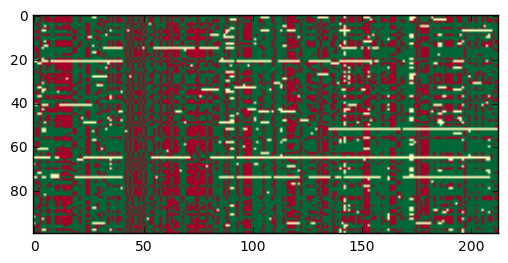

In [7]:
# Let's visualize the matrix directly.
plt.imshow(vote_matrix, cmap='RdYlGn')
plt.show()

Session has 49 Democrats, 49 Republicans, and 2 Independents


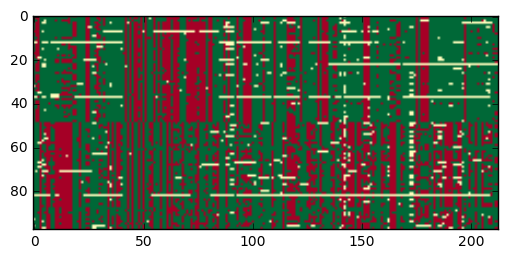

In [8]:
# There's quite the block structure there -- what if we re-arrange it by party?
dem_index = [i for i in range(len(parties)) if parties[i] == 'D']
rep_index = [i for i in range(len(parties)) if parties[i] == 'R']
ind_index = [i for i in range(len(parties)) if parties[i] == 'I']
print('Session has %d Democrats, %d Republicans, and %d Independents' % \
      (len(dem_index), len(rep_index), len(ind_index)))
plt.imshow(
    np.concatenate((vote_matrix[dem_index,:], vote_matrix[rep_index,:]),0),
    cmap='RdYlGn')
plt.show()

# Visualizing the variance distribution

In [11]:
# Pull in seaborn now...
import seaborn as sns
sns.set_style("white")

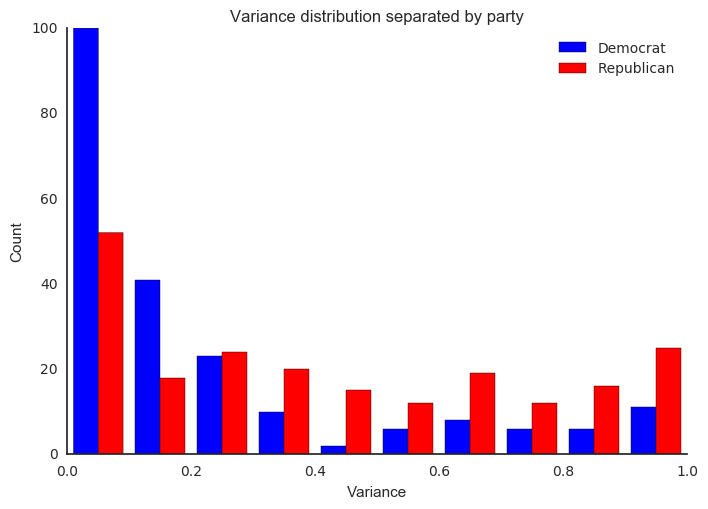

In [12]:
# Let's take a look at the variance within each party.
dem_vote_var = np.var(vote_matrix[dem_index,:],0)
rep_vote_var = np.var(vote_matrix[rep_index,:],0)
plt.hist([dem_vote_var, rep_vote_var], 10,
         color=['blue', 'red'], label=['Democrat', 'Republican'])
plt.legend()
plt.title('Variance distribution separated by party')
plt.ylabel('Count')
plt.xlabel('Variance')
sns.despine()
plt.show()

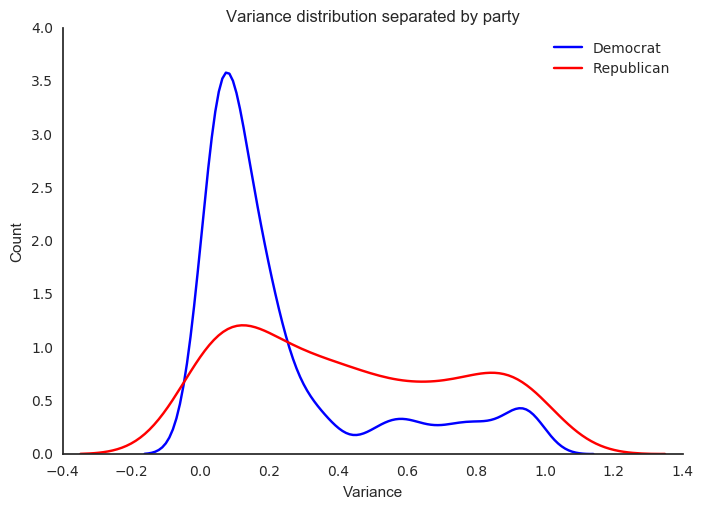

In [13]:
# Or with two KDE plots
dem_vote_var = np.var(vote_matrix[dem_index,:],0)
rep_vote_var = np.var(vote_matrix[rep_index,:],0)

sns.kdeplot(dem_vote_var, color='blue', label='Democrat')
sns.kdeplot(rep_vote_var, color='red', label='Republican')
sns.despine()
plt.legend()
plt.title('Variance distribution separated by party')
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()

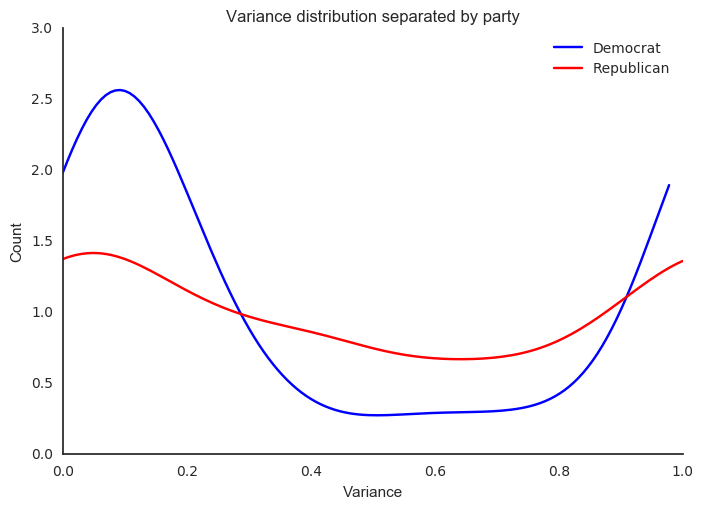

In [14]:
# The cut and bw parameters...
dem_vote_var = np.var(vote_matrix[dem_index,:],0)
rep_vote_var = np.var(vote_matrix[rep_index,:],0)

sns.kdeplot(dem_vote_var, color='blue', label='Democrat', cut=0, bw=0.1)
sns.kdeplot(rep_vote_var, color='red', label='Republican', cut=0, bw=0.1)
sns.despine()
plt.legend()
plt.title('Variance distribution separated by party')
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()

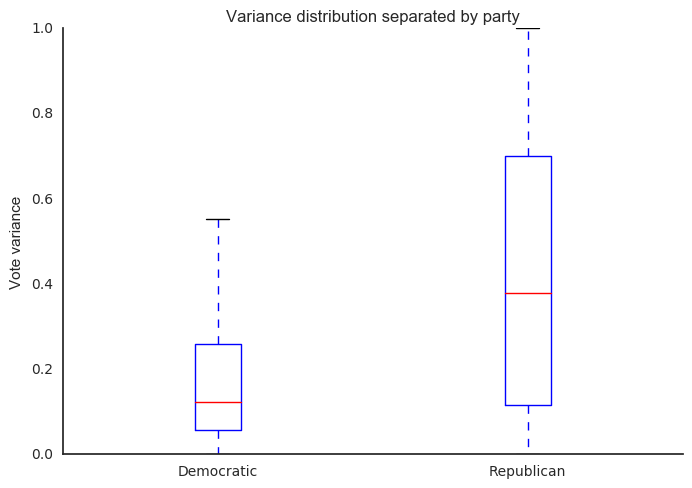

In [15]:
# Or with a box plot.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([dem_vote_var, rep_vote_var])
sns.despine()
ax.set_xticklabels(['Democratic', 'Republican'])
plt.title('Variance distribution separated by party')
plt.ylabel('Vote variance')
plt.show()

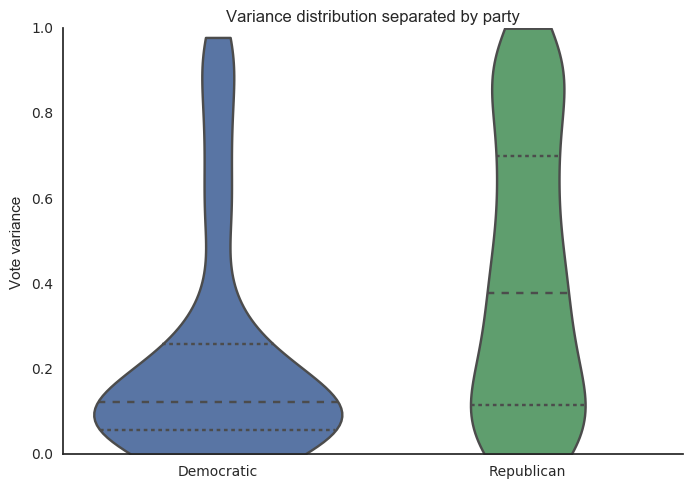

In [16]:
# Or with a violin plot.
fig = plt.figure()
ax = fig.add_subplot(111)
sns.violinplot(data=[dem_vote_var, rep_vote_var], inner='quartile', cut=0)
sns.despine()
ax.set_xticklabels(['Democratic', 'Republican'])
plt.title('Variance distribution separated by party')
plt.ylabel('Vote variance')
plt.show()

# Principal Component Analysis

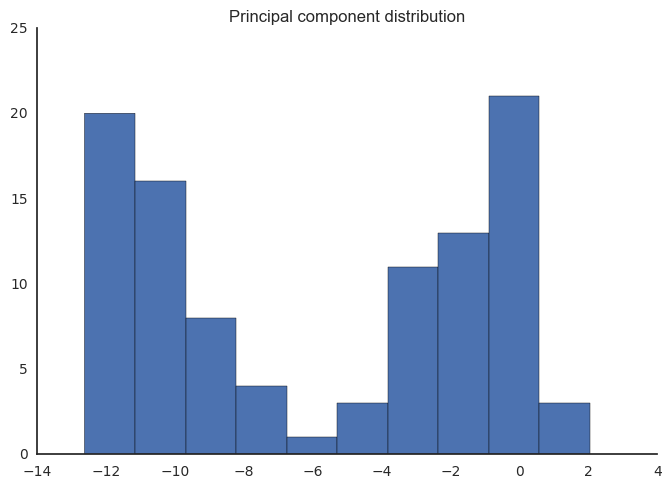

In [17]:
# Let's check out the distribution of the first principal component.
svd_u, svd_s, svd_v = np.linalg.svd(vote_matrix)
pc1 = np.squeeze(np.asarray(svd_v[1,:]))
senators_pc1 = np.squeeze(np.asarray(np.dot(vote_matrix, pc1)))
plt.hist(senators_pc1)
sns.despine()
plt.title('Principal component distribution')
plt.show()

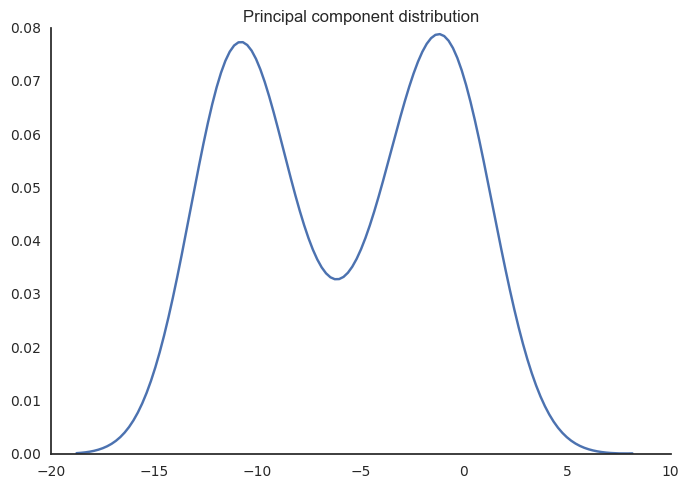

In [18]:
# That looks suspiciously smooth ... is this an instance of the bw parameter
# using a kernel that's too big?
sns.kdeplot(senators_pc1)
sns.despine()
plt.title('Principal component distribution')
plt.show()

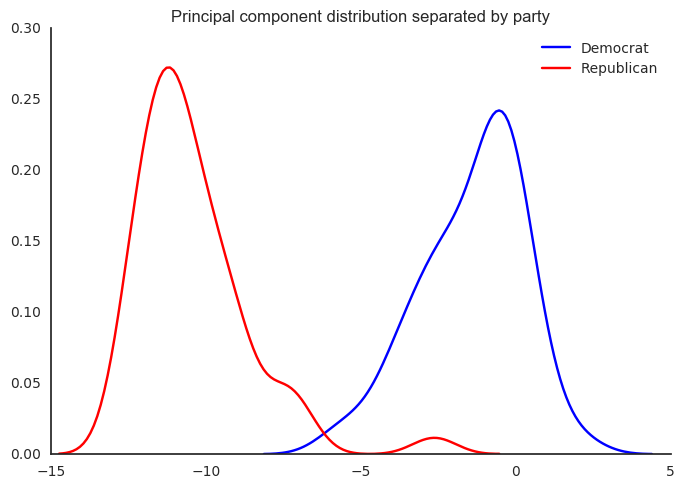

In [19]:
# Let's break down by party (the obvious choice for bimodality)
sns.kdeplot(senators_pc1[dem_index], color='blue', label='Democrat')
sns.kdeplot(senators_pc1[rep_index], color='red', label='Republican')
sns.despine()
plt.title('Principal component distribution separated by party')
plt.legend()
plt.show()

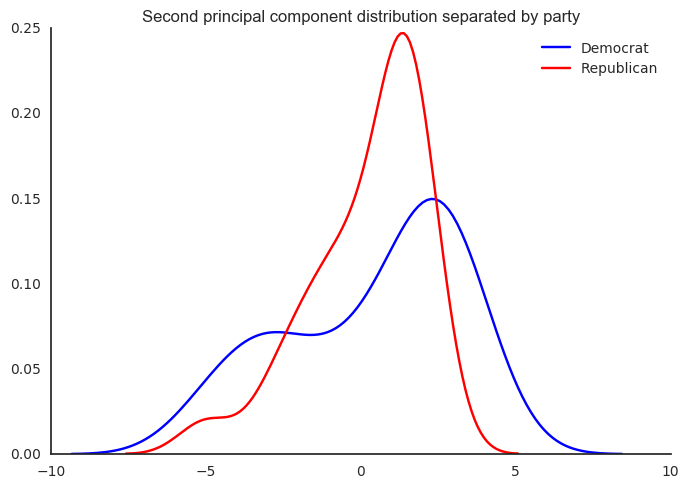

In [20]:
# That's definitely the first principal component. What does the second principal component 
# look like, with the same breakdown?
pc2 = np.squeeze(np.asarray(svd_v[2,:]))
senators_pc2 = np.squeeze(np.asarray(np.dot(vote_matrix, pc2)))
sns.kdeplot(senators_pc2[dem_index], color='blue', label='Democrat')
sns.kdeplot(senators_pc2[rep_index], color='red', label='Republican')
sns.despine()
plt.title('Second principal component distribution separated by party')
plt.legend()
plt.show()

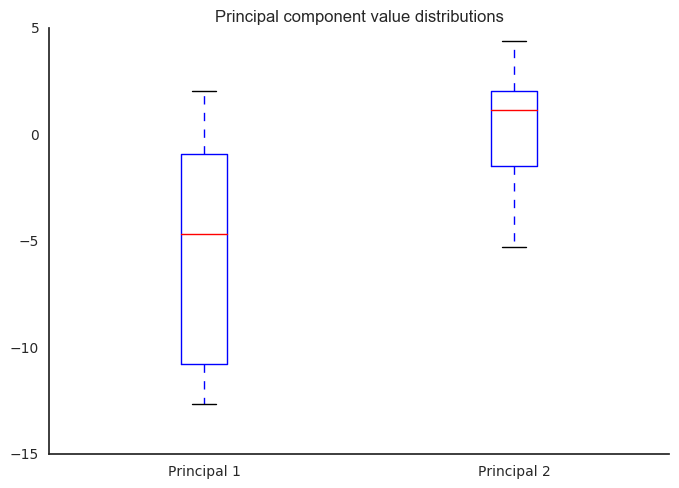

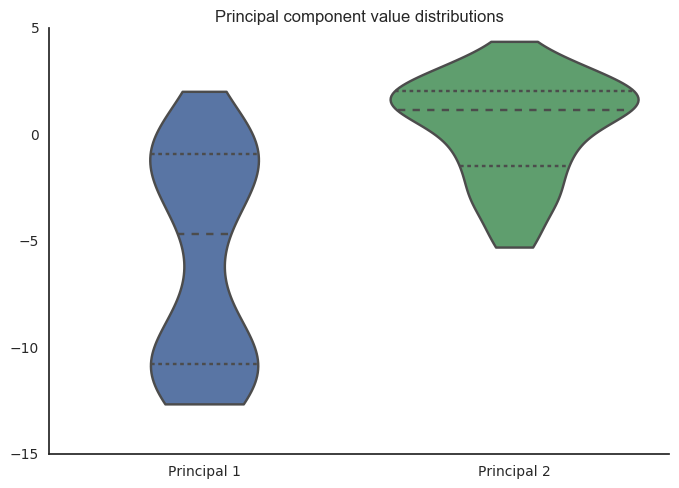

In [21]:
# To drive home the point about box plots versus violin plots and expressiveness, let's
# compare principal components 1 and 2.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([senators_pc1, senators_pc2])
sns.despine()
ax.set_xticklabels(['Principal 1', 'Principal 2'])
plt.title('Principal component value distributions')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
sns.violinplot(data=[senators_pc1, senators_pc2], inner='quartile', cut=0)
sns.despine()
ax.set_xticklabels(['Principal 1', 'Principal 2'])
plt.title('Principal component value distributions')
plt.show()

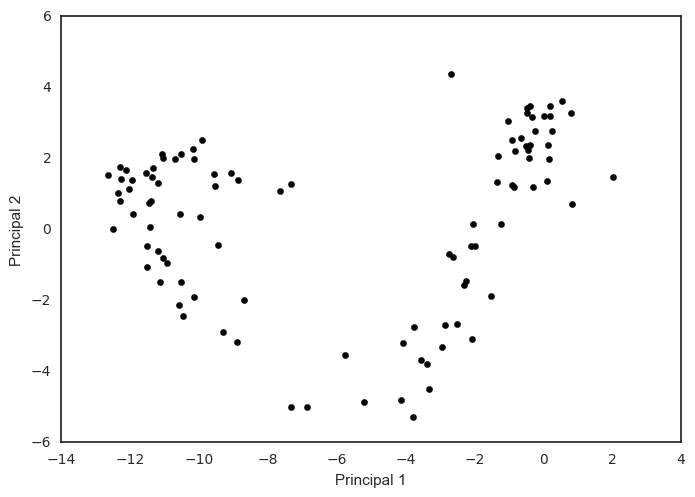

In [22]:
# What does this look like in 2D?
plt.scatter(senators_pc1, senators_pc2, color='k')
plt.xlabel("Principal 1")
plt.ylabel("Principal 2")
plt.show()

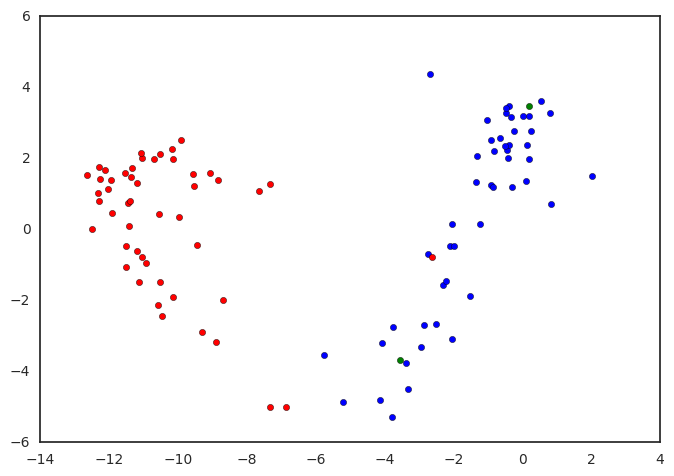

In [23]:
# What does this look like in 2D?
plt.scatter(senators_pc1[dem_index], senators_pc2[dem_index], c='blue')
plt.scatter(senators_pc1[rep_index], senators_pc2[rep_index], c='red')
plt.scatter(senators_pc1[ind_index], senators_pc2[ind_index], c='green')
plt.show()

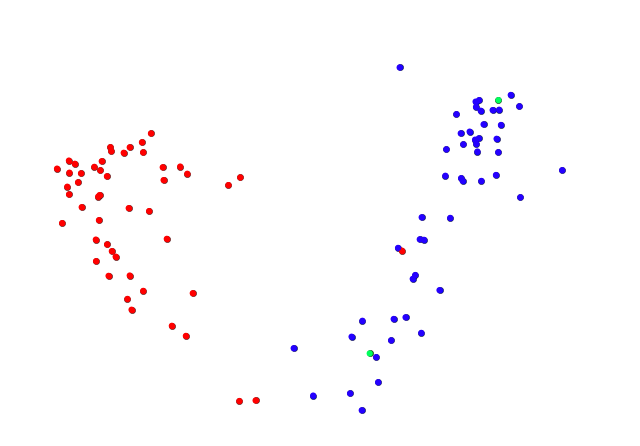

In [24]:
# This could be prettier...
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(senators_pc1[dem_index], senators_pc2[dem_index], c='blue')
plt.scatter(senators_pc1[rep_index], senators_pc2[rep_index], c='red')
plt.scatter(senators_pc1[ind_index], senators_pc2[ind_index], c='green')
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
def PartyColorHSV(party):
  if party  == 'R':
    return 0
  if party == 'D':
    return 0.7
  if party == 'I':
    return 0.4
senators_c = [PartyColorHSV(party) for party in parties]
ax.scatter(senators_pc1, senators_pc2, c=senators_c,
           cmap='hsv',
           norm=matplotlib.colors.Normalize(vmin=0, vmax=1),
           edgecolors='none')
plt.show()

In [25]:
# Now, let's get to interactivity